DSCI 100 Proposal - By Steven Lu (46989935)

1. Title: 

Levels of Heart Disease by Exploring Resting Blood Pressure (in mm Hg on admission to the hospital), Maximum Heart Rate Achieved and Age

2. Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Detrano et al. (1989) has investigated if a probability algorithm from the clinical and test characteristics could accurately predict coronary artery disease probabilities in samples drawn from various ethnic populations with different clinical characteristics. Now, I would like to make use of UCI website to do a further data analysis for the heart disease. We are given lots of data from 4 different locations: Cleveland, Hungarian, Switzerland and VA Long Beach.

I would use Hungarian dataframe because it contains sufficient observations. There are a total of 14 variables, "num" is the class I have to predict. I should use some of the other 13 as predictors to predict the class "num". Some of the variables are integers (numeric-type variables). The rest of them are categorial (factor-type variables). I would like to use a classification method to answer the question: For a given age, Resting Blood Pressure and Maximum Heart Rate Achieved, what is the predicted level of heart disease?


References:

Detrano, R., Jánosi, A., Steinbrunn, W., Pfisterer M., Schmid J., Sandhu S., Guppy K., Lee S., Froelicher V. (1989). International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9

Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. (1988). Heart Disease. UC Irving Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

3. Preliminary exploratory data analysis:- Demonstrate that the dataset can be read into R - Clean and wrangle your data into a tidy format - 
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.
- 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis..

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Demonstrate that the dataset can be read into R
# Assign the column name based on UCI Website
hungarian <- read.table("data/heart_disease/processed.hungarian.data", sep=",")
colnames(hungarian) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 'thalach',
                         'exang','oldpeak','slope','ca','thal','num')
hungarian

age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


In [3]:
# Clean and wrangle your data into a tidy format
# Mutate them so that they have the correct data type
# Named different diagnoses of heart disease for easier interpretation
# Removed observations that required columns have empty data
hungarian_clean <- hungarian |> mutate(age = as.integer(age), sex = as_factor(sex), 
                                       cp = as_factor(cp), 
                                       trestbps = as.integer(trestbps), 
                                       chol = as.integer(chol), 
                                       fbs = as_factor(fbs), 
                                       restcg = as_factor(restcg), 
                                       thalach = as.integer(thalach), 
                                       exang = as_factor(exang), 
                                       oldpeak = as.integer(oldpeak),
                                       slope = as_factor(slope), 
                                       ca = as.integer(ca), 
                                       thal = as_factor(thal), num = as_factor(num)) |>
                                mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
                                       num = fct_recode(num, 
                                                        "<50% Diameter Narrowing" = "0", 
                                                        ">50% Diameter Narrowing" = "1")) |>
                                filter(trestbps != "NA") |> filter(thalach != "NA") |> 
                                filter(num != "NA") |> filter(age != "NA")
                                    
                                     
hungarian_clean
                             
# Using the values of trestbps + thalach to predict/classify the num of an unknown patient.

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.integer(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
28,male,2,130,132,0,2,185,0,0,?,NA,?,<50% Diameter Narrowing
29,male,2,120,243,0,0,160,0,0,?,NA,?,<50% Diameter Narrowing
29,male,2,140,NA,0,0,170,0,0,?,NA,?,<50% Diameter Narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,male,4,155,342,1,0,150,1,3,2,NA,?,>50% Diameter Narrowing
58,female,2,180,393,0,0,110,1,1,2,NA,7,>50% Diameter Narrowing
65,male,4,130,275,0,1,115,1,1,2,NA,?,>50% Diameter Narrowing


In [4]:
set.seed(20)
# Select columns: trestbps, thalach, num, age
hungarian_clean <- hungarian_clean |> select(trestbps, thalach, num, age)

# Split the dataset into training set and testing set. Split into 75% training and 25% testing 
# since it is common

hungarian_split <- initial_split(hungarian_clean, prop = 0.75, strata = num)
hungarian_train <- training(hungarian_split)
hungarian_test <- testing(hungarian_split)

hungarian_train

trestbps,thalach,num,age
<int>,<int>,<fct>,<int>
130,185,<50% Diameter Narrowing,28
120,160,<50% Diameter Narrowing,29
140,170,<50% Diameter Narrowing,29
⋮,⋮,⋮,⋮
130,100,>50% Diameter Narrowing,54
180,110,>50% Diameter Narrowing,58
130,115,>50% Diameter Narrowing,65


In [5]:
# Using only training data, summarize the data in at least one table (this is exploratory 
# data analysis). An example of a useful table could be one that reports the number of 
# observations in each class, the means of the predictor variables you plan to use in your 
# analysis and how many rows have missing data.

hungarian_nummiss <- hungarian_train |> filter(trestbps == "NA" & 
                                               thalach == "NA" & 
                                               num == "NA" & age == "NA") |> nrow()
hungarian_nummiss

hungarian_countclass <- hungarian_train |> 
                        group_by(num) |>
                        summarize(count = n())
hungarian_countclass

hungarian_meanclass <- hungarian_train |> 
                        group_by(num) |>
                        summarize(mean_trestbps = mean(trestbps, na.rm = TRUE), 
                                  mean_thalach = mean(thalach, na.rm = TRUE),
                                 mean_age = mean(age, na.rm = TRUE))
hungarian_meanclass

[1] 0

num,count
<fct>,<int>
<50% Diameter Narrowing,140
>50% Diameter Narrowing,79


num,mean_trestbps,mean_thalach,mean_age
<fct>,<dbl>,<dbl>,<dbl>
<50% Diameter Narrowing,130.3143,144.4000,46.90714
>50% Diameter Narrowing,136.5443,129.8354,49.60759


num,type,means
<fct>,<chr>,<dbl>
<50% Diameter Narrowing,mean_trestbps,130.31429
<50% Diameter Narrowing,mean_thalach,144.40000
<50% Diameter Narrowing,mean_age,46.90714
>50% Diameter Narrowing,mean_trestbps,136.54430
>50% Diameter Narrowing,mean_thalach,129.83544
>50% Diameter Narrowing,mean_age,49.60759


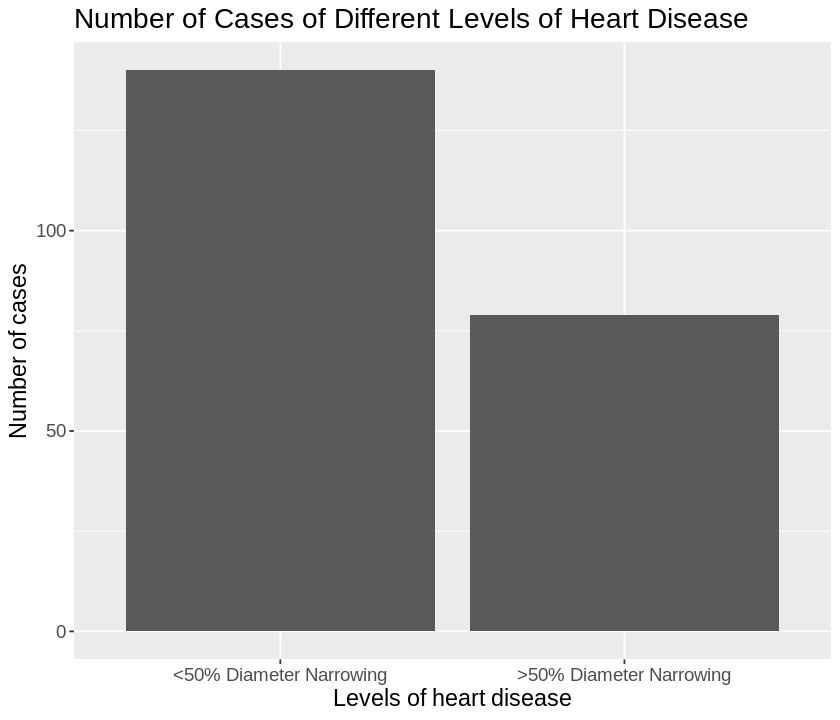

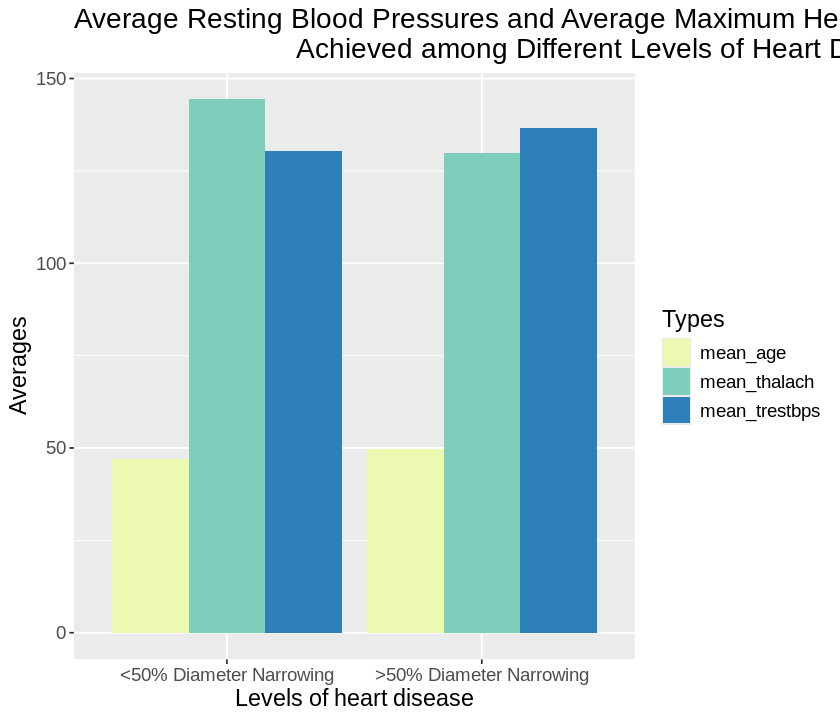

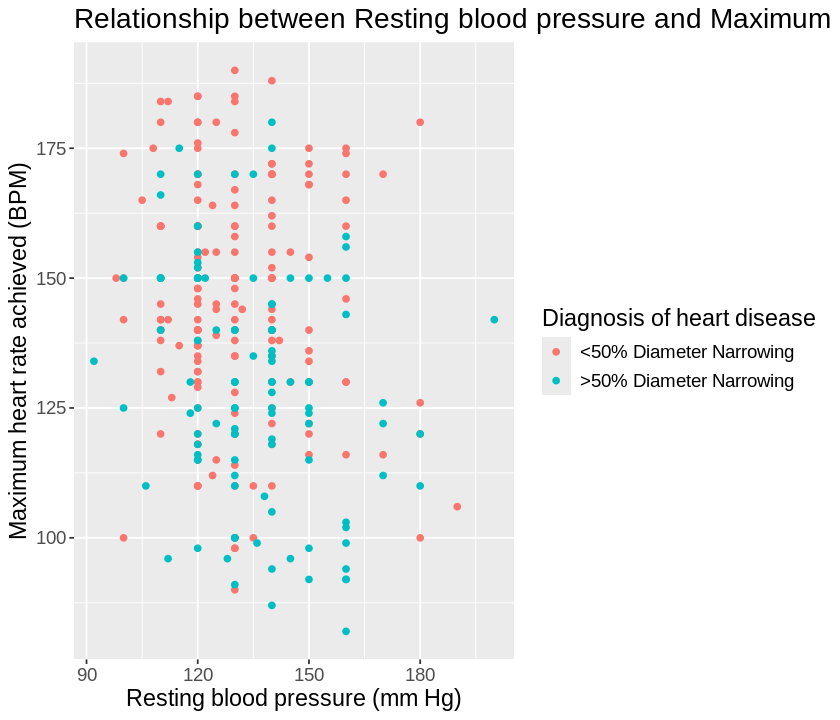

In [6]:
# Using only training data, visualize the data with at least one plot relevant to the analysis 
# you plan to do (this is exploratory data analysis). An example of a useful visualization 
# could be one that compares the distributions of each of the predictor variables you plan to 
# use in your analysis.

options(repr.plot.width = 7, repr.plot.height = 6)

hungarian_countclass_plot <- hungarian_countclass |>
                             ggplot(aes(x = num, y = count)) +
                             geom_bar(stat = "identity") + 
                             labs(x = "Levels of heart disease", y = "Number of cases",
                                 title = "Number of Cases of Different Levels of Heart Disease") +
                             scale_fill_brewer(palette = 'YlGnBu') +
                             theme(text = element_text(size = 14))
hungarian_countclass_plot

hungarian_longer <- hungarian_meanclass |> pivot_longer(cols = mean_trestbps:mean_age,
                                                        names_to = "type",
                                                        values_to = "means")
hungarian_longer

options(repr.plot.width = 7, repr.plot.height = 6)

hungarian_mean_plot <- hungarian_longer |>
                       ggplot(aes(x = num, y = means, fill = type)) +
                       geom_bar(stat = "identity", position = "dodge") + 
                       labs(x = "Levels of heart disease", y = "Averages", fill = "Types", 
                           title = "Average Resting Blood Pressures and Average Maximum Heart Rate 
                            Achieved among Different Levels of Heart Disease") +
                       scale_fill_brewer(palette = 'YlGnBu') +
                       theme(text = element_text(size = 14))
hungarian_mean_plot

options(repr.plot.width = 7, repr.plot.height = 6)

hungarian_train_plot <- hungarian_clean |>
                        ggplot(aes(x = trestbps, y = thalach, color = num)) +
                        geom_point() + 
                        labs(x = "Resting blood pressure (mm Hg)", 
                             y = "Maximum heart rate achieved (BPM)", 
                             colour = "Diagnosis of heart disease",
                            title = "Relationship between Resting blood pressure and Maximum heart rate achieved") +
                        scale_fill_brewer(palette = 'YlGnBu') +
                        theme(text = element_text(size = 14))

hungarian_train_plot

4. Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

I would like to use "trestbps" (resting blood pressure), "thalach" (maximum heart rate achieved) and "age" to predict "num" (levels of heart disease) for data analysis because, to my knowledge, I believe those 3 variables would significantly affect the diagnosis of heart disease. (e.g. We heard a lot that an elderly suffers from heart disease). I would like to use classification model for the prediction. It would be done with the use of k-nearest neighbor algorithm as it does not require any specific shape assumption for the algorithm to perform well. To analyse the data, I would like to first standarize the data, then try new sets of data and perform classification.

5. Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

I would expect that it is less likely to diagnose a patient that has >50% diameter narrowing since the number of cases is less than that of <50% diameter narrowing. Also, from the second graph, a patient would be more likely to have >50% diameter narrowing if he is older, has lower heart rate and higher blood pressure. I would also expect we can predict the diagnosis of a patient for given age, heart rate and blood pressure. The impact of the findings would be that it is more convenient and fast to diagnose the heart disease. But k-nearest neighbor is not an ideal model for medical diagnosis since medical diagnosis requires a very high accuracy, like 99.99%. I would foresee questions like whether there is a model that uses those 3 variables and predict a more accurate diagnosis.